In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Other imports for processing data
import string
import numpy as np
import pandas as pd

In [7]:
def tokenize_corpus(corpus, num_words=-1):
    # Fit a Tokenizer on the corpus
    if num_words > -1:
        tokenizer = Tokenizer(num_words=num_words)
    else:
        tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    return tokenizer

def create_lyrics_corpus(dataset, field):
    # Remove all other punctuation
    dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
    # Make it lowercase
    dataset[field] = dataset[field].str.lower()
    # Make it one long string to split by line
    lyrics = dataset[field].str.cat()
    corpus = lyrics.split('\n')
    # Remove any trailing whitespace
    for l in range(len(corpus)):
        corpus[l] = corpus[l].rstrip()
    # Remove any empty lines
    corpus = [l for l in corpus if l != '']

    return corpus

In [15]:
dataset

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,look at her face its a wonderful face \nand i...
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,take it easy with me please \ntouch me gently...
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,ill never know why i had to go \nwhy i had to...
3,ABBA,Bang,/a/abba/bang_20598415.html,making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,well you hoot and you holler and you make me m...
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,down in the street theyre all singing and shou...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,chiquitita tell me whats wrong \nyoure enchai...
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,i was out with the morning sun \ncouldnt slee...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,im waitin for you baby \nim sitting all alone...


In [13]:
dataset['text'].str.cat()

'look at her face its a wonderful face  \nand it means something special to me  \nlook at the way that she smiles when she sees me  \nhow lucky can one fellow be  \n  \nshes just my kind of girl she makes me feel fine  \nwho could ever believe that she could be mine  \nshes just my kind of girl without her im blue  \nand if she ever leaves me what could i do what could i do  \n  \nand when we go for a walk in the park  \nand she holds me and squeezes my hand  \nwell go on walking for hours and talking  \nabout all the things that we plan  \n  \nshes just my kind of girl she makes me feel fine  \nwho could ever believe that she could be mine  \nshes just my kind of girl without her im blue  \nand if she ever leaves me what could i do what could i do\n\ntake it easy with me please  \ntouch me gently like a summer evening breeze  \ntake your time make it slow  \nandante andante  \njust let the feeling grow  \n  \nmake your fingers soft and light  \nlet your body be the velvet of the night

In [8]:
# Read the dataset from csv - just first 10 songs for now

# Create the corpus using the 'text' column containing lyrics
corpus = create_lyrics_corpus(dataset, 'text')
# Tokenize the corpus
tokenizer = tokenize_corpus(corpus)

total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'you': 1, 'i': 2, 'and': 3, 'a': 4, 'me': 5, 'the': 6, 'is': 7, 'my': 8, 'to': 9, 'ma': 10, 'it': 11, 'of': 12, 'im': 13, 'your': 14, 'love': 15, 'so': 16, 'as': 17, 'that': 18, 'in': 19, 'andante': 20, 'boomaboomerang': 21, 'make': 22, 'on': 23, 'oh': 24, 'for': 25, 'but': 26, 'new': 27, 'bang': 28, 'its': 29, 'be': 30, 'like': 31, 'know': 32, 'now': 33, 'how': 34, 'could': 35, 'youre': 36, 'sing': 37, 'never': 38, 'no': 39, 'chiquitita': 40, 'can': 41, 'we': 42, 'song': 43, 'had': 44, 'good': 45, 'youll': 46, 'she': 47, 'just': 48, 'girl': 49, 'again': 50, 'will': 51, 'take': 52, 'please': 53, 'let': 54, 'am': 55, 'eyes': 56, 'was': 57, 'always': 58, 'cassandra': 59, 'blue': 60, 'time': 61, 'dont': 62, 'were': 63, 'return': 64, 'once': 65, 'then': 66, 'sorry': 67, 'cryin': 68, 'over': 69, 'feel': 70, 'ever': 71, 'believe': 72, 'what': 73, 'do': 74, 'go': 75, 'all': 76, 'out': 77, 'think': 78, 'every': 79, 'leave': 80, 'look': 81, 'at': 82, 'way': 83, 'one': 84, 'music': 85, 'down': 

C:\Users\sebas\AppData\Local\Temp\ipykernel_15416\2515487142.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')


In [19]:
[corpus[0]]

['look at her face its a wonderful face']

In [24]:
token_list = tokenizer.texts_to_sequences([corpus[0]])[0]
n_gram_sequence = token_list[:2]

In [25]:
n_gram_sequence

[81, 82]

In [27]:
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

# Pad sequences for equal input length
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

# Split sequences between the "input" sequence and "output" predicted word
input_sequences, labels = sequences[:,:-1], sequences[:,-1]
# One-hot encode the labels
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [29]:
sequences

array([[  0,   0,   0, ...,   0,  81,  82],
       [  0,   0,   0, ...,  81,  82, 142],
       [  0,   0,   0, ...,  82, 142, 197],
       ...,
       [  0,   0,   0, ...,   0,  13,  68],
       [  0,   0,   0, ...,  13,  68,  69],
       [  0,   0,   0, ...,  68,  69,   1]])

In [30]:
input_sequences

array([[  0,   0,   0, ...,   0,   0,  81],
       [  0,   0,   0, ...,   0,  81,  82],
       [  0,   0,   0, ...,  81,  82, 142],
       ...,
       [  0,   0,   0, ...,   0,   0,  13],
       [  0,   0,   0, ...,   0,  13,  68],
       [  0,   0,   0, ...,  13,  68,  69]])

In [6]:
# Check out how some of our data is being stored
# The Tokenizer has just a single index per word
print(tokenizer.word_index['know'])
print(tokenizer.word_index['feeling'])
# Input sequences will have multiple indexes
print(input_sequences[5])
print(input_sequences[6])
# And the one hot labels will be as long as the full spread of tokenized words
print(one_hot_labels[5])
print(one_hot_labels[6])

32
97
[  0   0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29
   4]
[  0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29   4
 287]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_sequences, one_hot_labels, epochs=200, verbose=1)

Epoch 1/200
62/62 [==============================] - 4s 6ms/step - loss: 5.9458 - accuracy: 0.0333
Epoch 2/200
62/62 [==============================] - 0s 6ms/step - loss: 5.4312 - accuracy: 0.0399
Epoch 3/200
62/62 [==============================] - 0s 6ms/step - loss: 5.3730 - accuracy: 0.0399
Epoch 4/200
62/62 [==============================] - 0s 7ms/step - loss: 5.3228 - accuracy: 0.0343
Epoch 5/200
62/62 [==============================] - 0s 7ms/step - loss: 5.2547 - accuracy: 0.0429
Epoch 6/200
62/62 [==============================] - 0s 7ms/step - loss: 5.1887 - accuracy: 0.0363
Epoch 7/200
62/62 [==============================] - 0s 7ms/step - loss: 5.1272 - accuracy: 0.0404
Epoch 8/200
62/62 [==============================] - 0s 7ms/step - loss: 5.0635 - accuracy: 0.0399
Epoch 9/200
62/62 [==============================] - 0s 7ms/step - loss: 5.0009 - accuracy: 0.0429
Epoch 10/200
62/62 [==============================] - 0s 6ms/step - loss: 4.9365 - accuracy: 0.0499
Epoch 11/

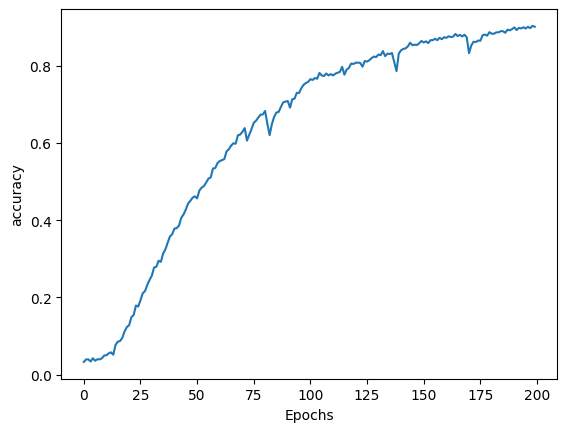

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, 'accuracy')

In [9]:
seed_text = "im feeling chills"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 16ms/step
im feeling chills me again in the morning your front show before before do do do think think think think think think think think only hope only used used had used used used used used believe believe lightly sleep sleep sleep sleep i never do had think am lightly chiquitita think knew have making making believe new crazy world leaving means for about know bedumbbedumbdumb plan bedumbbedumbdumb knew do believe used to had think think think think think think think think think think think think think think knew bone scars knew park knew sender knew sender knew sender final sky making making me
